# Sistemas Inteligentes

## Exercício Computacional 5 - Otimização

#### 1.2 Explicação do Problema

Para este EC escolhemos um dataset de regressão "load_diabetes", que também foi usado em outro laboratório, e utilizando as ferramentas conhecidas queremos minimizar a função para conhecer os limites de otimização deste dataset.

### 2. Técnica

#### 2.1 Identificação da Técnica

Algoritmos Genéticos como exemplificado no lab, com as seguintes alterações:

Indivíduos são formados  uma lista de coeficientes de um polinômio, com valores float

Por consequência, funções de geração, mutação e torneio são ajustadas de acordo

Função de avaliação é o Mean Squared Error



#### 2.2 Explicação da Técnica

Como nosso objetivo era de exemplificar um problema otimização, escolhemos um dataset de regressão, especificamente o "load_diabetes", para a base de nosso desenvolvimento usamos um exemplo de um artigo que usa polinômios para fazer essa regressão.
Antes de regredir nossa função, foi usada a ferramenta PCA para compressão de dados, neste caso reduzimos o dataset para apenas uma dimensionalidade (X e Y), tendo o X apenas uma coluna.
Após a preparação deste dataset, aplicamos a função para realizar os testes de otimização deste Dataset.

## 3. Desenvolvimento Polinômios

A base para o desenvolvimento foi o seguinte <a href="https://towardsdatascience.com/intro-to-evolutionary-computation-using-deap-618ca974b8cb">Artigo Introdutório ao DEAP</a>, que realiza a modelagem de um problema de regressão utilizando polinômios.

### 3.1 Inicialização e dataset Diabetes

In [11]:
# Instalação do Deap e importação das bibliotecas
#!pip install deap

import array
from numpy import random

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from deap import base, creator, tools, algorithms
# Importações do grãos
import cv2
import sys
sys.path.append("../")
from segmentation import processing_memory_fix

# Parâmetro Número de coeficientes no Polinômio
IND_SIZE = 5

Resultado = 230 grãos contados


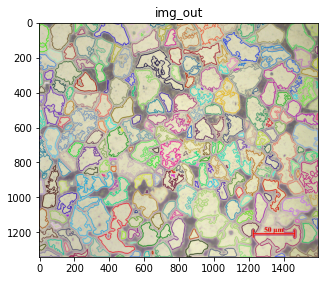

In [12]:
# Testando importações do grãos
img = cv2.imread("../data/Aco224.jpg")
s = [1, 191, 3, 5, 0, 2, 0, 41]
img_out, resultado = processing_memory_fix(img, s)
print("Resultado = {} grãos contados".format(resultado))
plt.figure(figsize=(5,5)); plt.title("img_out"); fig = plt.imshow(cv2.cvtColor(img_out.copy(),cv2.COLOR_BGR2RGB), 'gray')

In [13]:
# Carregando Dataset Diabetes
from sklearn.datasets import load_diabetes

X_full, Y = load_diabetes(return_X_y=True)

# Redução de dimensionalidade para uma dimensão Aplicando PCA
from sklearn.decomposition import PCA
X = PCA(n_components=1).fit_transform(X_full)
X = X[:,0].reshape(-1)

# Alterando formato do dataset para compatibilidade com o código
data = list(zip(X, Y))

# Ordenando dataset 
data = sorted(data, key=lambda tup: tup[0])

print(data[:10])
print(X.shape)
print(Y.shape)

[(-0.21466104597519378, 143.0), (-0.20513847280352318, 37.0), (-0.19721963028166128, 152.0), (-0.19220794435185845, 85.0), (-0.18915479410800604, 99.0), (-0.18866027963679183, 97.0), (-0.18603771275152337, 72.0), (-0.18482853739742686, 137.0), (-0.18341941762497502, 101.0), (-0.17899936363801536, 48.0)]
(442,)
(442,)


### 3.2 Criação de Tipos, Toolbox, Função de Avaliação e Operadores Genéticos

In [14]:
# Definindo tipos GRAIN
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Definindo tipos LAB
# creator.create("FitnessMax", base.Fitness, weights=(1.0,))
# creator.create("Individual", list, fitness=creator.FitnessMax)

# Definindo tipos EC
# creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
# creator.create("Individual", array.array, typecode="d", fitness=creator.FitnessMin, strategy=None)
# creator.create("Strategy", array.array, typecode="d")

C:\Users\Bruno\Anaconda3\envs\grain-training\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\Users\Bruno\Anaconda3\envs\grain-training\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [5]:
# Toolbox
toolbox = base.Toolbox()

# Definindo funções para gerar indivíduos novos GRAIN

def generateES(ind_cls, strg_cls, size):
    ind = ind_cls(random.normal() for _ in range(size))
    ind.strategy = strg_cls(random.normal() for _ in range(size))
    return ind

toolbox.register("individual", generateES, creator.Individual, creator.Strategy, IND_SIZE)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Definindo funções para gerar indivíduos novos LAB

# toolbox.register("attr_bool", random.randint, 0, 1)
# toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 25) # tamanho do cromossomo
# toolbox.register("population", tools.initRepeat, list, toolbox.individual)


# Definindo funções para gerar indivíduos novos EC

# def generateES(ind_cls, strg_cls, size):
#     ind = ind_cls(random.normal() for _ in range(size))
#     ind.strategy = strg_cls(random.normal() for _ in range(size))
#     return ind

# toolbox.register("individual", generateES, creator.Individual, creator.Strategy, IND_SIZE)
# toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [6]:
# Definindo funções evolucionárias LAB

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Definindo funções evolucionárias EC

# toolbox.register("mate", tools.cxESBlend, alpha=0.1)
# toolbox.register("mutate", tools.mutESLogNormal, c=1.0, indpb=0.3)
# toolbox.register("select", tools.selTournament, tournsize=3)

In [7]:
# Definindo funções de avaliação LAB

def evalOneMax(individual):
    return sum(individual),

toolbox.register("evaluate", evalOneMax)

# Definindo funções de avaliação EC

# # Na predição, o indivíduo é lido como um polinômio
# def pred(ind, x):
#     y_ = 0.0
#     for i in range(1,IND_SIZE):
#         y_ += ind[i-1]*x**i
#     y_ += ind[IND_SIZE-1]
#     return y_

# # A função de avaliação é o erro médio quadrático
# def evalFitness(ind, data):
#     mse = 0.0
#     for x, y in data:
#         y_ = pred(ind, x)
#         mse += (y - y_)**2
#     return mse/len(data),

# toolbox.register("evaluate", evalFitness, data=data)

### 3.3 Evolução

In [8]:
# Parâmetros
# Número de indivíduos
MU = 100
#LAMBDA = 200

# Número de gerações
NGEN = 100

def main():
    pop = toolbox.population(n=50)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb = 0.5, mutpb=0.2, 
                                   ngen=50, stats=stats, halloffame=hof, verbose=True)
    return pop, log, hof

# def main():
#     pop = toolbox.population(n=MU)
#     hof = tools.HallOfFame(1)
#     stats = tools.Statistics(lambda ind: ind.fitness.values)
#     stats.register("avg", np.mean)
#     stats.register("std", np.std)
#     stats.register("min", np.min)
#     stats.register("max", np.max)
#     pop, log = algorithms.eaSimple(pop, toolbox, cxpb = 0.5, mutpb=0.3, ngen=NGEN, stats=stats, halloffame=hof, verbose=False)
#     #pop, log = algorithms.eaMuCommaLambda(pop, toolbox, mu=MU, lambda_=LAMBDA, cxpb=0.3, mutpb=0.4, ngen=NGEN, stats=stats, halloffame=hof, verbose=True)
#     return pop, log, hof

gen	nevals	avg	std	min	max
0  	50    	0  	0  	0  	0  
1  	25    	1.7	2.92062	0  	11 
2  	32    	4.54	3.25705	0  	11 
3  	26    	7.84	2.78108	0  	13 
4  	37    	10.24	2.01554	6  	14 
5  	30    	11.86	1.86558	8  	16 
6  	26    	13.4 	1.49666	11 	17 
7  	28    	14.54	1.38867	11 	17 
8  	33    	15.26	1.48068	11 	18 
9  	35    	16.26	1.50745	12 	19 
10 	24    	17.16	1.51473	12 	20 
11 	31    	17.94	1.60512	13 	21 
12 	28    	18.64	1.41082	12 	20 
13 	28    	18.62	1.58606	14 	21 
14 	30    	19.1 	1.48661	13 	21 
15 	29    	19.36	1.79733	14 	21 
16 	30    	20.52	0.899778	17 	22 
17 	27    	20.66	1.47797 	15 	22 
18 	33    	20.98	1.91301 	12 	22 
19 	35    	20.94	2.0631  	14 	23 
20 	24    	21.5 	1.57797 	16 	23 
21 	30    	21.54	1.94124 	15 	23 
22 	40    	21.9 	1.76918 	15 	23 
23 	31    	21.84	1.81505 	17 	23 
24 	27    	22.26	1.83096 	16 	23 
25 	27    	22.42	1.49787 	17 	24 
26 	36    	22.22	1.68867 	18 	25 
27 	30    	22.08	1.91666 	17 	24 
28 	30    	22.16	1.84781 	15 	24 
29 	37    	22

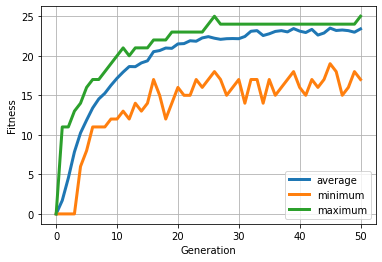

In [9]:
if __name__ == "__main__":
    pop, log, hof = main()
    print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))
    
    gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
    plt.plot(gen, avg, label="average", linewidth=3)
    plt.plot(gen, min_, label="minimum", linewidth=3)
    plt.plot(gen, max_, label="maximum", linewidth=3)
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# if __name__ == "__main__":
#     pop, log, hof = main()
#     print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))
    
#     gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
#     plt.plot(gen, avg, label="average", linewidth=3)
#     plt.plot(gen, min_, label="minimum", linewidth=3)
#     plt.plot(gen, max_, label="maximum", linewidth=3)
#     plt.xlabel("Generation")
#     plt.ylabel("Fitness")
#     plt.legend(loc="lower right")
#     plt.grid(True)
#     plt.show()

#     fig = plt.figure()
#     ax = fig.add_subplot(1, 1, 1)
#     ax.set_xlabel('x')
#     ax.set_ylabel('y')

#     ax.scatter(X, Y, color='g')
    
#     Y_ = np.array([pred(hof[0], x) for x in X])
#     ax.plot(X, Y_)

## Discussão sobre os resultados

Como resultado final temos o gráfico da regressão, podemos ver que nosso dataset chega no valor minimo esperado, sem muitas oscilações, também podemos ver que os valores de máximo, média e mínimo caminham juntos até a 20ª iteração, depois disso o valor de máxima acaba oscilando mais que os outros, fazendo o que ele demorasse mais para chegar no valor que desejado.
Como conclusão podemos tirar que a função usada funciona, sendo satisfatório o resultado a otimização, mesmo com o dataset demorando para regredir.
O melhor indivíduo da população na geração final representou uma curva similar a uma reta, com uma inclinação que procura ajustar os dados.
O Mean Squared Error do melhor indivíduo ainda é bastante alto, mas é de se esperar esse resultado ao observar os dados.

## Fontes


https://towardsdatascience.com/intro-to-evolutionary-computation-using-deap-618ca974b8cb

https://deap.readthedocs.io/en/master/

https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset